<a href="https://colab.research.google.com/github/Gcango/Projecto_6/blob/main/Analise_Seguradoras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O projeto em questão analisa um conjunto de dados provenientes do manual da SUSEP (Superintendência de Seguros Privados) [Autoseg: https://www2.susep.gov.br/menuestatistica/Autoseg/principal.aspx], especificamente das páginas 81 a 87, os quais abordam os sinistros de automóveis ocorridos no Brasil ao longo do ano de 2020. Estes dados foram submetidos a um processo rigoroso de transformação e análise aprofundada, incluindo a exclusão de informações irrelevantes, com o intuito de extrair resultados significativos que possam orientar decisões importantes para a organização. O desenvolvimento desse projeto contou com valiosas orientações da professora Patricia Ramos, que ofereceu insights valiosos ao longo do processo. No decorrer do notebook utilizado para a análise, uma série de questões foram levantadas e devidamente respondidas, visando a compreensão abrangente do projeto e dos dados em análise. Esses resultados apresentados no notebook não apenas fornecem informações cruciais para a tomada de decisões, mas também oferecem insights valiosos que podem influenciar estratégias futuras da organização. Ao identificar padrões, tendências e pontos de atenção nos sinistros de automóveis, a equipe responsável pelo projeto pode tomar medidas proativas para mitigar riscos, otimizar processos e, consequentemente, melhorar a eficiência operacional e reduzir custos. Em suma, este projeto representa uma abordagem abrangente e detalhada na análise de dados relacionados a sinistros de automóveis no Brasil em 2020, destacando a importância da análise de dados para a tomada de decisões informadas e estratégicas no setor de seguros.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive, files

pd.options.display.float_format = '{:.2f}'.format

In [6]:
base_dados = pd.read_csv("/content/Seguradoras.csv",sep=";", decimal=',')

In [7]:
base_dados.sample(5)

,Unnamed: 0,ITEM,MODALIDADE,TIPO_PROD,COBERTURA,MODELO,ANO_MODELO,COD_TARIF,REGIAO,COD_CONT,...,D_RESS,D_AVI,D_LIQ,D_OCORR,CAUSA,SEXO,D_NASC,CEP,DATA,IDADE
44920,44923,1,VMR,Perfil,Compreensiva,001305-6,2011,10,99.00,1,...,0.00,20200723.00,0.00,20200720.00,9.00,M,19851001.00,11623436.00,1985-10-01,38.0
56877,56880,1,VMR,Perfil,Compreensiva,004477-6,2017,23,13.00,1,...,0.00,20201118.00,20210226.00,20201115.00,4.00,F,19751022.00,13732528.00,1975-10-22,48.0
23706,23706,713,VMR,Padrão,Outros,999999-9,2018,10,16.00,1,...,0.00,20201110.00,20210115.00,20200913.00,9.00,0,0.00,30110000.00,NaN,Não informada
29601,29601,1,VMR,Perfil,Compreensiva,004360-5,2014,10,15.00,1,...,0.00,20200828.00,20201024.00,20200828.00,9.00,M,19520402.00,37780000.00,1952-04-02,72.0
78738,78742,1,VMR,Perfil,Compreensiva,023154-1,2018,10,10.00,1,...,0.00,20200928.00,20201105.00,20200928.00,9.00,M,19931212.00,11431000.00,1993-12-12,30.0


In [8]:
#1) - Analise Exploratória dos dados.

In [9]:
base_dados.columns

Index(['Unnamed: 0', 'ITEM', 'MODALIDADE', 'TIPO_PROD', 'COBERTURA', 'MODELO',
       'ANO_MODELO', 'COD_TARIF', 'REGIAO', 'COD_CONT', 'EVENTO', 'INDENIZ',
       'VAL_SALVAD', 'D_SALVADO', 'VAL_RESS', 'D_RESS', 'D_AVI', 'D_LIQ',
       'D_OCORR', 'CAUSA', 'SEXO', 'D_NASC', 'CEP', 'DATA', 'IDADE'],
      dtype='object')

In [10]:
dados = base_dados.copy()

In [11]:
dados.sample(5)

,Unnamed: 0,ITEM,MODALIDADE,TIPO_PROD,COBERTURA,MODELO,ANO_MODELO,COD_TARIF,REGIAO,COD_CONT,...,D_RESS,D_AVI,D_LIQ,D_OCORR,CAUSA,SEXO,D_NASC,CEP,DATA,IDADE
31657,31658,0,VMR,Padrão,Compreensiva,023083-9,2012,10,11.00,1,...,0.00,20201025.00,20201113.00,20201023.00,7.00,F,19970329.00,4514001.00,1997-03-29,27.0
10881,10881,0,VMR,Padrão,Compreensiva,003455-0,2019,10,25.00,1,...,0.00,20200825.00,20200916.00,20200824.00,7.00,M,19620418.00,59152330.00,1962-04-18,62.0
24954,24954,0,VMR,Padrão,Compreensiva,004357-5,2016,23,11.00,1,...,0.00,20200727.00,20200814.00,20200723.00,7.00,M,19780825.00,5468060.00,1978-08-25,45.0
21147,21147,0,VMR,Perfil,Compreensiva,001431-1,2017,14A,14.00,1,...,0.00,20201105.00,0.00,20201031.00,4.00,F,19700928.00,0.00,1970-09-28,53.0
87525,87529,0,VMR,Perfil,Compreensiva,002153-9,2018,10,11.00,1,...,0.00,20201203.00,0.00,20201203.00,2.00,M,19571116.00,9861000.00,1957-11-16,66.0


In [12]:
dados = dados.drop(['Unnamed: 0'], axis=1)

In [13]:
dados.head()

,ITEM,MODALIDADE,TIPO_PROD,COBERTURA,MODELO,ANO_MODELO,COD_TARIF,REGIAO,COD_CONT,EVENTO,...,D_RESS,D_AVI,D_LIQ,D_OCORR,CAUSA,SEXO,D_NASC,CEP,DATA,IDADE
0,0,VMR,Padrão,Compreensiva,004354-0,2009,10,11.00,1,8,...,0.00,20201016.00,20201026.00,20201015.00,7.00,M,19740216.00,9371420.00,1974-02-16,50.0
1,0,VMR,Padrão,Compreensiva,004354-0,2009,10,11.00,1,8,...,0.00,20201017.00,20201026.00,20201016.00,7.00,M,19740216.00,9371420.00,1974-02-16,50.0
2,0,VMR,Padrão,Compreensiva,004354-0,2009,10,11.00,1,8,...,0.00,20201017.00,20201105.00,20201016.00,7.00,M,19740216.00,9030620.00,1974-02-16,50.0
3,0,VMR,Padrão,Compreensiva,004354-0,2009,10,11.00,1,8,...,0.00,20200812.00,20200819.00,20200811.00,7.00,M,19740216.00,9371520.00,1974-02-16,50.0
4,0,VMR,Padrão,Compreensiva,004354-0,2009,10,11.00,1,8,...,0.00,20200812.00,20200819.00,20200811.00,7.00,M,19740216.00,0.00,1974-02-16,50.0


In [14]:
print("A base de dados tem", dados.shape[0], "Linhas e ", dados.shape[1], "Colunas")

A base de dados tem 88433 Linhas e  24 Colunas


In [15]:
dados.describe()

,ITEM,ANO_MODELO,REGIAO,COD_CONT,EVENTO,INDENIZ,VAL_SALVAD,D_SALVADO,VAL_RESS,D_RESS,D_AVI,D_LIQ,D_OCORR,CAUSA,D_NASC,CEP
count,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00,88433.00
mean,32.99,2013.15,14.99,1.01,3.86,3173.08,253.05,302223.37,8.06,24678.91,20201306.66,15039799.56,20200974.62,6.71,16808664.86,33467974.47
std,319.16,41.44,10.61,0.09,3.35,12362.03,3516.13,2452373.35,522.21,705762.31,1744.50,8812312.10,1127.24,2.27,6984139.58,32384424.60
min,0.00,0.00,0.00,1.00,0.00,-4526.00,-116000.00,0.00,-7000.00,0.00,20190927.00,0.00,20121208.00,1.00,0.00,0.00
25%,0.00,2012.00,11.00,1.00,1.00,98.00,0.00,0.00,0.00,0.00,20200819.00,0.00,20200814.00,4.00,19530315.00,5835005.00
50%,0.00,2014.00,12.00,1.00,1.00,238.00,0.00,0.00,0.00,0.00,20201007.00,20201004.00,20201002.00,7.00,19681124.00,18130351.00
75%,1.00,2018.00,18.00,1.00,8.00,1233.00,0.00,0.00,0.00,0.00,20201123.00,20201211.00,20201117.00,9.00,19810205.00,60811050.00
max,54224.00,2021.00,99.00,2.00,8.00,822746.00,208000.00,20220201.00,63141.00,20220217.00,20210227.00,20220304.00,20210227.00,9.00,20210918.00,99999999.00


In [16]:
# 2) - Verificação de Dados Faltantes

In [17]:
dados.isna().sum()

ITEM              0
MODALIDADE        0
TIPO_PROD         0
COBERTURA         0
MODELO            0
ANO_MODELO        0
COD_TARIF         0
REGIAO            0
COD_CONT          0
EVENTO            0
INDENIZ           0
VAL_SALVAD        0
D_SALVADO         0
VAL_RESS          0
D_RESS            0
D_AVI             0
D_LIQ             0
D_OCORR           0
CAUSA             0
SEXO              0
D_NASC            0
CEP               0
DATA          13023
IDADE             0
dtype: int64

In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88433 entries, 0 to 88432
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ITEM        88433 non-null  int64  
 1   MODALIDADE  88433 non-null  object 
 2   TIPO_PROD   88433 non-null  object 
 3   COBERTURA   88433 non-null  object 
 4   MODELO      88433 non-null  object 
 5   ANO_MODELO  88433 non-null  int64  
 6   COD_TARIF   88433 non-null  object 
 7   REGIAO      88433 non-null  float64
 8   COD_CONT    88433 non-null  int64  
 9   EVENTO      88433 non-null  int64  
 10  INDENIZ     88433 non-null  float64
 11  VAL_SALVAD  88433 non-null  int64  
 12  D_SALVADO   88433 non-null  int64  
 13  VAL_RESS    88433 non-null  float64
 14  D_RESS      88433 non-null  float64
 15  D_AVI       88433 non-null  float64
 16  D_LIQ       88433 non-null  float64
 17  D_OCORR     88433 non-null  float64
 18  CAUSA       88433 non-null  float64
 19  SEXO        88433 non-nul

In [19]:
# 3) - Resumir as colunas do dataset com valores unicos existente
for column in dados.columns:
    print(f"{column}: Number of unique values {dados[column].nunique()}")
    print("==========================================================")

ITEM: Number of unique values 1148
MODALIDADE: Number of unique values 3
TIPO_PROD: Number of unique values 2
COBERTURA: Number of unique values 6
MODELO: Number of unique values 3483
ANO_MODELO: Number of unique values 52
COD_TARIF: Number of unique values 72
REGIAO: Number of unique values 43
COD_CONT: Number of unique values 2
EVENTO: Number of unique values 9
INDENIZ: Number of unique values 12394
VAL_SALVAD: Number of unique values 925
D_SALVADO: Number of unique values 225
VAL_RESS: Number of unique values 114
D_RESS: Number of unique values 85
D_AVI: Number of unique values 361
D_LIQ: Number of unique values 507
D_OCORR: Number of unique values 527
CAUSA: Number of unique values 8
SEXO: Number of unique values 3
D_NASC: Number of unique values 18261
CEP: Number of unique values 33882
DATA: Number of unique values 18257
IDADE: Number of unique values 92


In [20]:
#) 4 - Definir Limite de Idade, Ano de Modelo, Indeminização, Sexo e valor Salvado dos dados dos assegurados, para serem analisados

In [21]:
dados['IDADE'] = dados['IDADE'].replace({'Não informada': 0})

In [22]:
dados['IDADE'].unique()

array(['50.0', '33.0', '60.0', '53.0', 0, '45.0', '66.0', '41.0', '73.0',
       '58.0', '84.0', '47.0', '46.0', '40.0', '42.0', '56.0', '63.0',
       '75.0', '39.0', '35.0', '34.0', '31.0', '55.0', '44.0', '37.0',
       '49.0', '69.0', '32.0', '43.0', '54.0', '67.0', '72.0', '51.0',
       '74.0', '59.0', '65.0', '62.0', '38.0', '57.0', '68.0', '25.0',
       '36.0', '64.0', '71.0', '52.0', '78.0', '48.0', '83.0', '61.0',
       '30.0', '76.0', '28.0', '80.0', '70.0', '23.0', '79.0', '29.0',
       '77.0', '86.0', '89.0', '82.0', '26.0', '27.0', '90.0', '24.0',
       '87.0', '85.0', '81.0', '96.0', '102.0', '88.0', '93.0', '91.0',
       '92.0', '99.0', '95.0', '3.0', '97.0', '22.0', '101.0', '94.0',
       '13.0', '100.0', '6.0', '123.0', '4.0', '106.0', '98.0', '10.0',
       '2.0', '5.0', '104.0'], dtype=object)

In [23]:
dados['IDADE'] = pd.to_numeric(dados['IDADE'], errors='coerce').astype('Int64')

In [24]:
dados['IDADE'].dtypes

Int64Dtype()

In [25]:
dados = dados[(dados['IDADE'] > 18) & (dados['IDADE'] < 100)]

In [26]:
dados = dados[(dados['ANO_MODELO'] > 0) & (dados['INDENIZ'] >= 0) & (dados['SEXO'] != "0") & (dados['VAL_SALVAD'] >= 0)]

In [27]:
dados.sample(5)

,ITEM,MODALIDADE,TIPO_PROD,COBERTURA,MODELO,ANO_MODELO,COD_TARIF,REGIAO,COD_CONT,EVENTO,...,D_RESS,D_AVI,D_LIQ,D_OCORR,CAUSA,SEXO,D_NASC,CEP,DATA,IDADE
87606,1,VMR,Perfil,Compreensiva,002111-3,2016,10,27.00,1,1,...,0.00,20200724.00,0.00,20200722.00,4.00,F,19720417.00,63200000.00,1972-04-17,52
69415,1,VMR,Perfil,Compreensiva,015156-4,2019,10,3.00,1,1,...,0.00,20200630.00,20200707.00,20200622.00,9.00,F,19890226.00,88817000.00,1989-02-26,35
60487,1,VMR,Perfil,Compreensiva,003281-6,2007,10,13.00,1,1,...,0.00,20200727.00,0.00,20200724.00,9.00,F,19920311.00,13469681.00,1992-03-11,32
67444,1,VMR,Perfil,Compreensiva,005228-0,2013,10,27.00,1,8,...,0.00,20200706.00,20200812.00,20200703.00,9.00,F,19791230.00,60824245.00,1979-12-30,44
47219,1,VMR,Perfil,Compreensiva,001273-4,2013,10,23.00,1,1,...,0.00,20200821.00,0.00,20200818.00,9.00,M,19680801.00,53635085.00,1968-08-01,55


In [28]:
print("A base de dados tem", dados.shape[0], "Linhas e ", dados.shape[1], "Colunas")

A base de dados tem 74955 Linhas e  24 Colunas


In [29]:
# 5) - Analise das Idades dos Motoristas assegurados

In [30]:
num_motoristas = dados['IDADE'].count()
print("São no total",num_motoristas, "Motoristas Assegurados")

São no total 74955 Motoristas Assegurados


In [31]:
idades_frequentes = dados['IDADE'].value_counts().head(20)
print("As idades mais frequentes dos motoristas da Asseguradoras são:\n",idades_frequentes)

As idades mais frequentes dos motoristas da Asseguradoras são:
 IDADE
41    2222
42    2173
46    2133
44    2112
43    2093
45    1999
40    1877
53    1856
47    1846
48    1817
39    1785
49    1763
37    1692
59    1676
58    1674
52    1671
61    1670
56    1664
50    1624
38    1620
Name: count, dtype: Int64


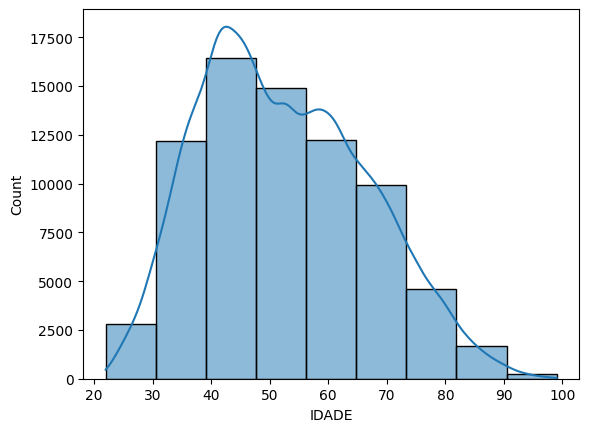

In [32]:
sns.histplot(data=dados, x='IDADE', bins=9, kde=True);

In [33]:
media_idade = dados['IDADE'].mean()

In [34]:
dados_motoristas = dados['IDADE'].describe()
print("A média de Idade dos Motoristas Assegurados é de ", round(media_idade, 2))
print("A idade mínima dos Motoristas Assegurados é de: ", dados_motoristas.iloc[3], "Anos de Idade")
print("A idade Máxima dos Motoristas Assegurados é de: ", dados_motoristas.iloc[7],"Anos de Idade")
print("25% dos Motoristas Assegurados estão abaixo dos: ", dados_motoristas.iloc[4],"Anos de Idade")
print("A mediana da idade dos Motoristas Assegurados é de: ", dados_motoristas.iloc[5],"Anos de Idade")
print("75% dos Motoristas Assegurados estão abaixo dos: ", dados_motoristas.iloc[6],"Anos de Idade")

A média de Idade dos Motoristas Assegurados é de  52.49
A idade mínima dos Motoristas Assegurados é de:  22.0 Anos de Idade
A idade Máxima dos Motoristas Assegurados é de:  99.0 Anos de Idade
25% dos Motoristas Assegurados estão abaixo dos:  41.0 Anos de Idade
A mediana da idade dos Motoristas Assegurados é de:  51.0 Anos de Idade
75% dos Motoristas Assegurados estão abaixo dos:  63.0 Anos de Idade


In [35]:
# 6) - Analise do Genero dos Assegurados

In [36]:
genero = dados['SEXO'].value_counts()
genero1 = dados['SEXO'].value_counts(normalize=True)
print("Quanto ao Género os Assegurados estão distribuidos em: \n", genero)
print()
print("Porcentagem(%): \n", genero1*100)

Quanto ao Género os Assegurados estão distribuidos em: 
 SEXO
M    40386
F    34569
Name: count, dtype: int64

Porcentagem(%): 
 SEXO
M   53.88
F   46.12
Name: proportion, dtype: float64


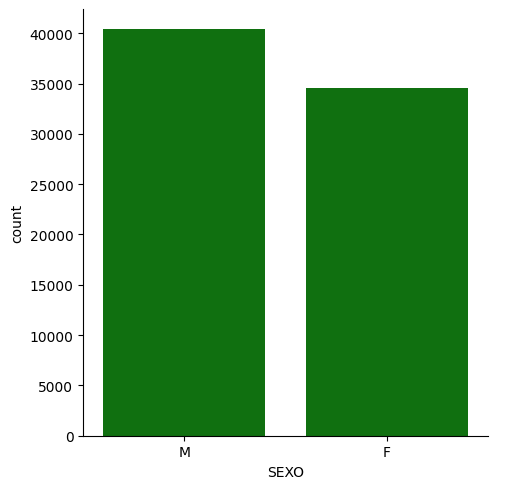

In [37]:
sns.catplot(data=dados, x='SEXO', kind='count', color='green');

In [38]:
# 7) - Analise da Corbertura dos Assegurados

####A Cobertura dos assegurados, é distribuidos da seguinte forma:
1.   Cobertura compreensiva
2.   Cobertura de incêndio e roubo
3.   Cobertura de incêndio
4.   Indenização integral, colisão e roubo
5.   Cobertura de colisão e incêndio
9.   Item de lista

In [39]:
dados['COBERTURA'].unique()

array(['Compreensiva', 'Indenização integral, colisão e roubo',
       'Incêndio e roubo', 'Outros', 'Colisão e incêndio', 'Incêndio'],
      dtype=object)

In [40]:
tipo_cobertura = dados.groupby('COBERTURA').size().reset_index(name='Nº Condutores')
print("Os Condutores aderem mais o seguro com a seguinte cobertura:\n", tipo_cobertura)

Os Condutores aderem mais o seguro com a seguinte cobertura:
                                COBERTURA  Nº Condutores
0                     Colisão e incêndio              6
1                           Compreensiva          72591
2                               Incêndio              3
3                       Incêndio e roubo            460
4  Indenização integral, colisão e roubo           1080
5                                 Outros            815


In [41]:
tipo_cobertura_gen = dados.groupby('COBERTURA')['SEXO'].agg('value_counts')
print("Numa distribuição pode genero os Condutores aderem mais o seguri com a seguinte cobertura:\n", tipo_cobertura_gen)

Numa distribuição pode genero os Condutores aderem mais o seguri com a seguinte cobertura:
 COBERTURA                              SEXO
Colisão e incêndio                     F           5
                                       M           1
Compreensiva                           M       38791
                                       F       33800
Incêndio                               F           3
Incêndio e roubo                       M         360
                                       F         100
Indenização integral, colisão e roubo  M         699
                                       F         381
Outros                                 M         535
                                       F         280
Name: count, dtype: int64


In [42]:
# 8) - Análise da distribuição de eventos por tipo de produto

In [43]:
tipo_produtos = dados['TIPO_PROD'].value_counts(normalize=True)
print("Os produtos disponíveis no Dataset em Porcentagem(%): ", tipo_produtos*100)

Os produtos disponíveis no Dataset em Porcentagem(%):  TIPO_PROD
Perfil   54.42
Padrão   45.58
Name: proportion, dtype: float64


In [44]:
val_tipo_produtos = tipo_produtos = dados['TIPO_PROD'].value_counts()
print("Os Produtos disponíveis no Dataset São: \n ", val_tipo_produtos)

Os Produtos disponíveis no Dataset São: 
  TIPO_PROD
Perfil    40788
Padrão    34167
Name: count, dtype: int64


In [45]:
# 9) - Análise da distribuição da Modalidade do seguro

In [46]:
dados['MODALIDADE'].unique()

array(['VMR', 'RCF', 'VR'], dtype=object)

####Analise das Modalidade de seguro.
De acordo com o manual da SUSEP a modalidade é expresa de acordo com alguns codigos que podem ser:
VMR - Valor de Mercado Referenciado
VR - Valor Determinado
RCF - Produtos com uma única cobertura (Cobertura para Responsabilidade Civil: danos causados a terceiros) Neste caso, é importante analisarmos essas variaveis em torno do dataset.
Quais modalidades foram mais aderidas no processo de Seguro.


In [47]:
tipos_modalidade = dados['MODALIDADE'].unique()
print("Os tipos de Modalidades aderidas no seguro são: ", tipos_modalidade)

Os tipos de Modalidades aderidas no seguro são:  ['VMR' 'RCF' 'VR']


In [48]:
tipo_modalidade2 = dados.groupby('MODALIDADE').size().reset_index(name='Nº Assegurados')
print("Os Motoristas adiriram o seguro com base nas seguintes modalidade:\n", tipo_modalidade2)

Os Motoristas adiriram o seguro com base nas seguintes modalidade:
   MODALIDADE  Nº Assegurados
0        RCF             374
1        VMR           74543
2         VR              38


In [49]:
causas_modalidade = dados.groupby('MODALIDADE')['CAUSA'].value_counts()
print("Análise das Modalidades por Causas de Sinistros")
print("Por Modalidades os valores são:\n  ", causas_modalidade)

Análise das Modalidades por Causas de Sinistros
Por Modalidades os valores são:
   MODALIDADE  CAUSA
RCF         9.00       202
            4.00       146
            2.00        22
            7.00         2
            5.00         1
            1.00         1
VMR         7.00     28329
            9.00     26347
            4.00     12607
            2.00      5802
            5.00      1014
            3.00       337
            1.00        77
            6.00        30
VR          4.00        23
            9.00         5
            2.00         4
            1.00         3
            5.00         2
            3.00         1
Name: count, dtype: int64


In [50]:
valor_med_indenização = dados.groupby('MODALIDADE')['INDENIZ'].mean().reset_index(name='Valores em Reais')
print("Análise de valor médio de indenização por modalidade de seguro")
print("Por Modalidades os valores são:\n  ", valor_med_indenização)

Análise de valor médio de indenização por modalidade de seguro
Por Modalidades os valores são:
     MODALIDADE  Valores em Reais
0        RCF           6728.68
1        VMR           2708.48
2         VR          19026.61


In [51]:
cobertura_comum = dados.groupby('MODALIDADE')['COBERTURA'].value_counts()
print("Análise de cobertura mais comum por modalidade de seguro")
print("Modalidades a cobertura mais comum é:\n  ", cobertura_comum)

Análise de cobertura mais comum por modalidade de seguro
Modalidades a cobertura mais comum é:
   MODALIDADE  COBERTURA                            
RCF         Compreensiva                               183
            Outros                                     171
            Indenização integral, colisão e roubo       19
            Incêndio e roubo                             1
VMR         Compreensiva                             72375
            Indenização integral, colisão e roubo     1061
            Outros                                     639
            Incêndio e roubo                           459
            Colisão e incêndio                           6
            Incêndio                                     3
VR          Compreensiva                                33
            Outros                                       5
Name: count, dtype: int64


In [52]:
idade_media_ass = dados.groupby('MODALIDADE')['IDADE'].mean()
print("Análise de idade média dos segurados por modalidade de seguro:")
print("A idade média dos assegurados é: \n",idade_media_ass)

Análise de idade média dos segurados por modalidade de seguro:
A idade média dos assegurados é: 
 MODALIDADE
RCF   49.94
VMR   52.50
VR    53.16
Name: IDADE, dtype: Float64


####Os Eventos no dataset são entendidos da seguinte forma:
1.   Casco
2.   Responsabilidade Civil Facultativa de Veículos – Danos Materiais
3.   Responsabilidade Civil Facultativa de Veículos – Danos Corporais
4.   Responsabilidade Civil Facultativa de Veículos – Danos Morais
5.   Acidentes Pessoais Passageiros – Morte Acidental
6.   Acidentes Pessoais Passageiros – Invalidez Permanente por Acidente
7.   Acidentes Pessoais Passageiros – Despesas MédicoHospitalares  
8.   Outros

In [53]:
mod_eventos = dados.groupby('MODALIDADE')[['EVENTO','COBERTURA']].agg('value_counts')
print("Análise da Modalidade com base nos eventos e Coberturas")
print(mod_eventos)

Análise da Modalidade com base nos eventos e Coberturas
MODALIDADE  EVENTO  COBERTURA                            
RCF         2       Compreensiva                               170
                    Outros                                      87
            1       Outros                                      83
            2       Indenização integral, colisão e roubo       13
            8       Compreensiva                                10
            1       Compreensiva                                 3
            8       Indenização integral, colisão e roubo        3
            1       Indenização integral, colisão e roubo        3
                    Incêndio e roubo                             1
            3       Outros                                       1
VMR         1       Compreensiva                             35294
            8       Compreensiva                             31018
            2       Compreensiva                              5982
            1  

In [54]:
# 10) - Analise dos Eventos e Causas

In [55]:
dados['EVENTO'].unique()

array([8, 1, 2, 0, 3, 5, 4, 7, 6])

In [56]:
c_eventos = dados.groupby('EVENTO').size().reset_index(name="Qtd de Eventos")
c_eventos = c_eventos.sort_values(by="Qtd de Eventos", ascending=False)
c_eventos

,EVENTO,Qtd de Eventos
1,1,36092
8,8,32158
2,2,6595
3,3,62
0,0,27
5,5,14
4,4,5
6,6,1
7,7,1


####Os Eventos no dataset são entendidos da seguinte forma:
1.   Casco
2.   Responsabilidade Civil Facultativa de Veículos – Danos Materiais
3.   Responsabilidade Civil Facultativa de Veículos – Danos Corporais
4.   Responsabilidade Civil Facultativa de Veículos – Danos Morais
5.   Acidentes Pessoais Passageiros – Morte Acidental
6.   Acidentes Pessoais Passageiros – Invalidez Permanente por Acidente
7.   Acidentes Pessoais Passageiros – Despesas MédicoHospitalares  
8.   Outros

####Causas de Sinistros
1 Roubo/Furto  (este código somente deve ser utilizado quando a companhia não dispõe das informações de Roubo e Furto separadamente) 2 Roubo 3 Furto 4 Colisão parcial 5 Colisão Indenização Integral 6 Incêndio 7 Assistência 24 horas 9 Outros

In [57]:
dados['CAUSA'].unique()

array([7., 4., 2., 9., 6., 5., 1., 3.])

In [58]:
dados['CAUSA'].value_counts()

CAUSA
7.00    28331
9.00    26554
4.00    12776
2.00     5828
5.00     1017
3.00      338
1.00       81
6.00       30
Name: count, dtype: int64

#####Traduzindo este resultado pela significancia,podemos entender que as causas das sinistraliade apontada no dataset são:

7 - Assistência 24 horas - com  28331
9 - Outros - com 26554
4 - Colisão parcial - com 12776
2 - Roubo - com 5828
5 - Colisão Indenização Integral - com 1017
3 - Furto - com 338
1 - Roubo/Furto - com 81
6 - Incêndio - com 30


In [59]:
c_causas = dados.groupby('CAUSA').size().reset_index(name="Qtd de Eventos")
c_causas = c_eventos.sort_values(by="Qtd de Eventos", ascending=False)
c_causas

,EVENTO,Qtd de Eventos
1,1,36092
8,8,32158
2,2,6595
3,3,62
0,0,27
5,5,14
4,4,5
6,6,1
7,7,1


In [60]:
causa_eve = dados.groupby('EVENTO')[['CAUSA']].agg('value_counts')
causa_eve

EVENTO  CAUSA
0       9.00        23
        4.00         4
1       9.00     21097
        4.00      7904
        2.00      5806
        5.00       849
        3.00       328
        1.00        79
        6.00        29
2       4.00      4522
        9.00      1913
        5.00       160
3       9.00        32
        4.00        29
        5.00         1
4       9.00         4
        4.00         1
5       9.00        10
        4.00         2
        5.00         1
        1.00         1
6       4.00         1
7       4.00         1
8       7.00     28331
        9.00      3475
        4.00       312
        2.00        22
        3.00        10
        5.00         6
        1.00         1
        6.00         1
Name: count, dtype: int64

In [61]:
#11) - Analisando algumas variaveis Numéricas

In [62]:
dados.columns

Index(['ITEM', 'MODALIDADE', 'TIPO_PROD', 'COBERTURA', 'MODELO', 'ANO_MODELO',
       'COD_TARIF', 'REGIAO', 'COD_CONT', 'EVENTO', 'INDENIZ', 'VAL_SALVAD',
       'D_SALVADO', 'VAL_RESS', 'D_RESS', 'D_AVI', 'D_LIQ', 'D_OCORR', 'CAUSA',
       'SEXO', 'D_NASC', 'CEP', 'DATA', 'IDADE'],
      dtype='object')

In [63]:
#Verificando os modelos de veiculos dos assegurados com histograma

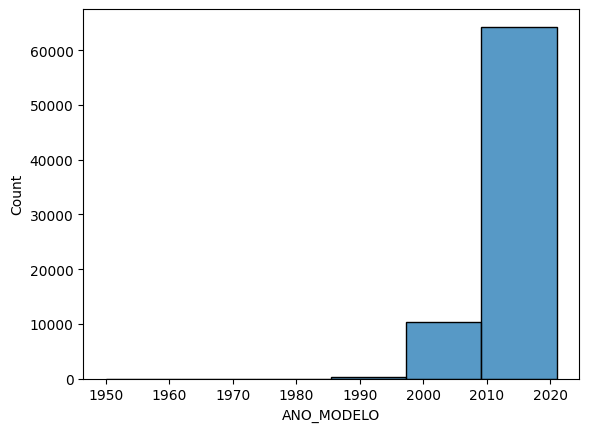

In [64]:
sns.histplot(data=dados, x='ANO_MODELO', bins=6);

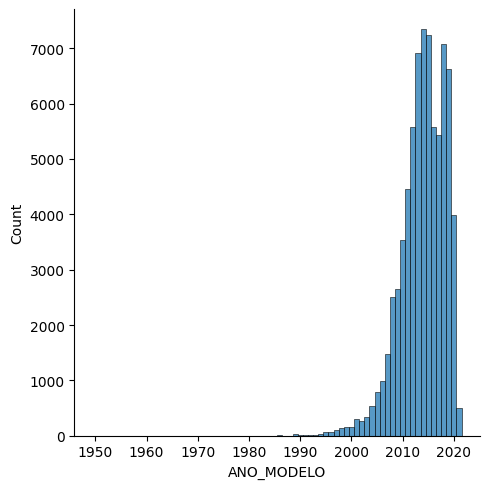

In [65]:
sns.displot(dados, x='ANO_MODELO', discrete=True);

De acordo com este gráfico, o modelos dos veículos nesta base de dados, fixam-se no intervalo de 1990 a 2020.

In [66]:
#Checar os modelos acima dos anos de 2000

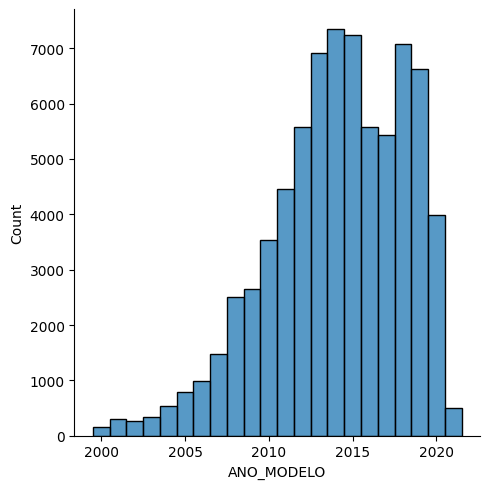

In [67]:
dados = dados[dados['ANO_MODELO']>= 2000]
sns.displot(dados, x='ANO_MODELO', discrete=True);

In [68]:
#12) - Analise do ano do modelo pelo Genero do motorista.

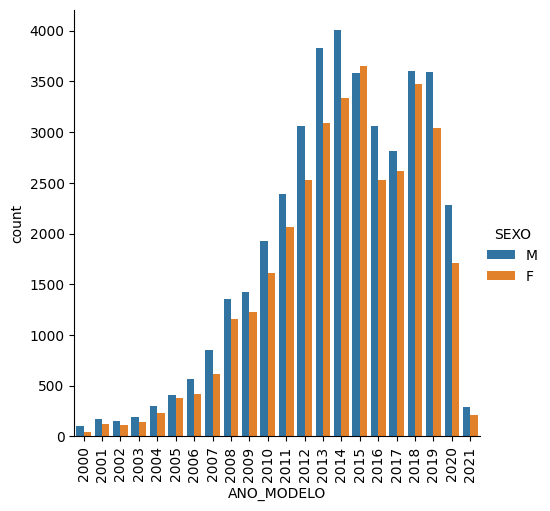

In [69]:
graf = sns.catplot(data=dados, x='ANO_MODELO', hue='SEXO', kind='count');
graf.tick_params(axis='x', rotation=90);

In [70]:
#13) - Analise dos Genero por Causa de sinistros

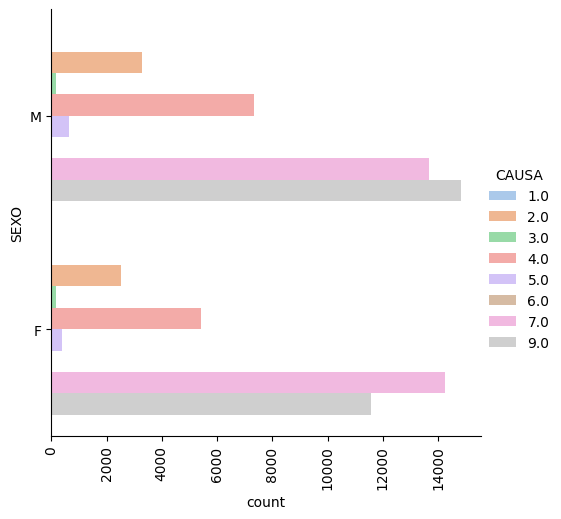

In [71]:
graf2 = sns.catplot(data=dados, y="SEXO", hue='CAUSA', kind='count', palette='pastel');
graf2.tick_params(axis='x', rotation=90);

In [72]:
#14) - Analise do gráfico do numero de occorencia de cada causa de sinistro devidindo por genero

In [73]:
dados.groupby(['CAUSA','SEXO']).size().unstack(fill_value=0);

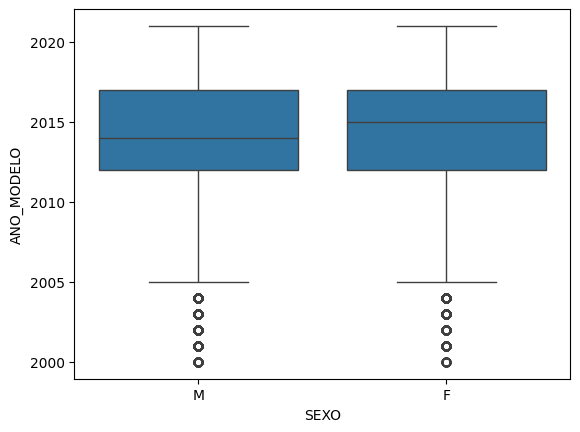

In [74]:
sns.boxplot(data=dados, x="SEXO", y='ANO_MODELO');

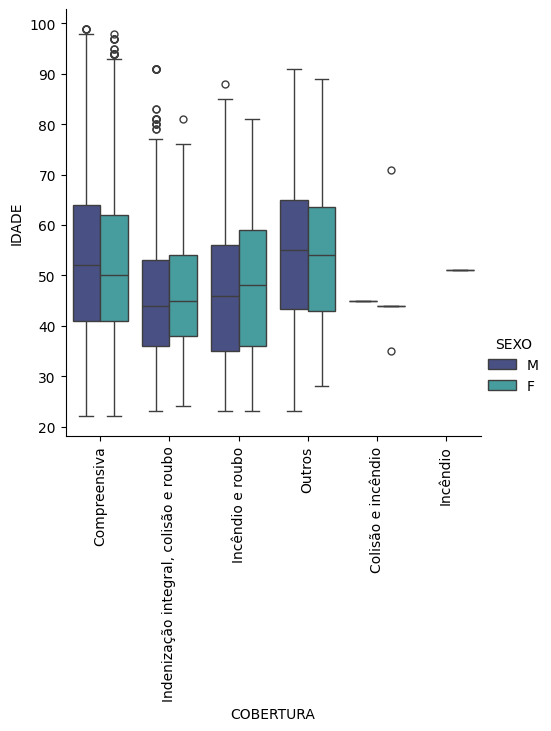

In [75]:
graf3 = sns.catplot(data=dados, x='COBERTURA', y='IDADE', hue='SEXO', kind='box', palette='mako')
graf3.tick_params(axis='x', rotation=90);

In [76]:
#15) - Analise da Correlações das variaveis

In [77]:
dados.corr(numeric_only=True)

,ITEM,ANO_MODELO,REGIAO,COD_CONT,EVENTO,INDENIZ,VAL_SALVAD,D_SALVADO,VAL_RESS,D_RESS,D_AVI,D_LIQ,D_OCORR,CAUSA,D_NASC,CEP,IDADE
ITEM,1.00,0.01,0.01,0.00,-0.04,0.03,0.02,0.03,-0.00,-0.00,0.00,0.02,-0.01,-0.04,0.02,0.01,-0.02
ANO_MODELO,0.01,1.00,0.10,0.00,-0.01,0.07,0.01,-0.03,0.01,-0.01,0.04,0.08,0.03,-0.12,0.06,0.10,-0.06
REGIAO,0.01,0.10,1.00,0.02,-0.12,0.02,0.00,0.00,0.00,-0.01,0.00,-0.11,-0.01,-0.02,0.06,0.09,-0.06
COD_CONT,0.00,0.00,0.02,1.00,-0.04,0.03,0.01,0.00,-0.00,-0.00,-0.00,-0.07,-0.01,0.02,0.00,0.03,-0.00
EVENTO,-0.04,-0.01,-0.12,-0.04,1.00,-0.20,-0.03,-0.03,-0.01,-0.03,-0.10,0.54,-0.04,0.15,-0.20,-0.25,0.20
INDENIZ,0.03,0.07,0.02,0.03,-0.20,1.00,0.39,0.22,0.05,0.03,0.03,-0.04,0.04,-0.22,0.04,0.04,-0.04
VAL_SALVAD,0.02,0.01,0.00,0.01,-0.03,0.39,1.00,0.59,0.03,0.02,-0.01,0.01,-0.00,-0.03,0.02,0.00,-0.02
D_SALVADO,0.03,-0.03,0.00,0.00,-0.03,0.22,0.59,1.00,0.02,0.05,-0.01,0.00,-0.00,-0.01,0.03,-0.01,-0.03
VAL_RESS,-0.00,0.01,0.00,-0.00,-0.01,0.05,0.03,0.02,1.00,0.30,-0.00,-0.01,-0.00,-0.01,0.00,0.00,-0.00
D_RESS,-0.00,-0.01,-0.01,-0.00,-0.03,0.03,0.02,0.05,0.30,1.00,0.00,0.00,-0.00,-0.01,0.00,0.01,0.00


In [78]:
dados.columns

Index(['ITEM', 'MODALIDADE', 'TIPO_PROD', 'COBERTURA', 'MODELO', 'ANO_MODELO',
       'COD_TARIF', 'REGIAO', 'COD_CONT', 'EVENTO', 'INDENIZ', 'VAL_SALVAD',
       'D_SALVADO', 'VAL_RESS', 'D_RESS', 'D_AVI', 'D_LIQ', 'D_OCORR', 'CAUSA',
       'SEXO', 'D_NASC', 'CEP', 'DATA', 'IDADE'],
      dtype='object')

In [79]:
dados.loc[:,['ANO_MODELO', 'INDENIZ', 'VAL_SALVAD', 'VAL_RESS', 'IDADE']].corr()

,ANO_MODELO,INDENIZ,VAL_SALVAD,VAL_RESS,IDADE
ANO_MODELO,1.00,0.07,0.01,0.01,-0.06
INDENIZ,0.07,1.00,0.39,0.05,-0.04
VAL_SALVAD,0.01,0.39,1.00,0.03,-0.02
VAL_RESS,0.01,0.05,0.03,1.00,-0.00
IDADE,-0.06,-0.04,-0.02,-0.00,1.00


In [80]:
#mapa de calor

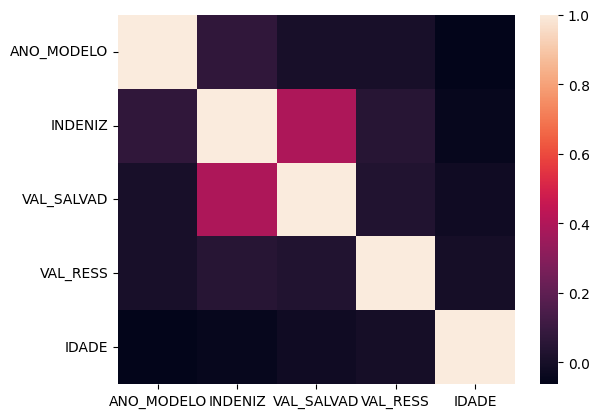

In [81]:
sns.heatmap(dados.loc[:,['ANO_MODELO', 'INDENIZ', 'VAL_SALVAD', 'VAL_RESS', 'IDADE']].corr());

In [82]:
#16) - Analise do diagrama de dispersão

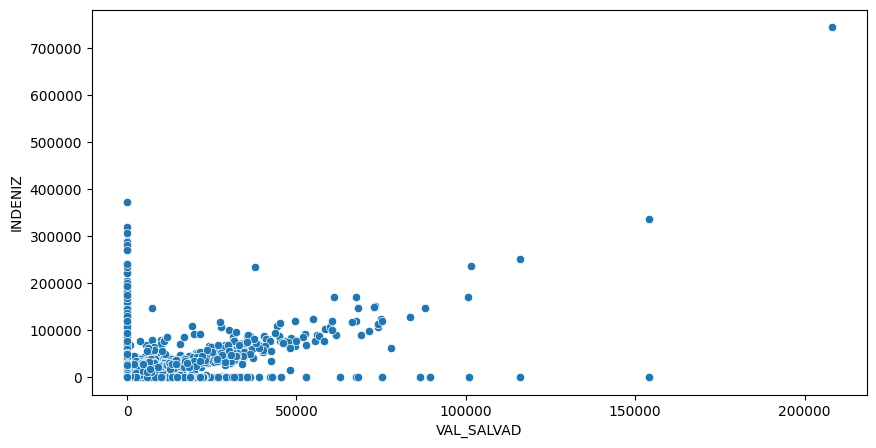

In [83]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=dados, x='VAL_SALVAD', y='INDENIZ');

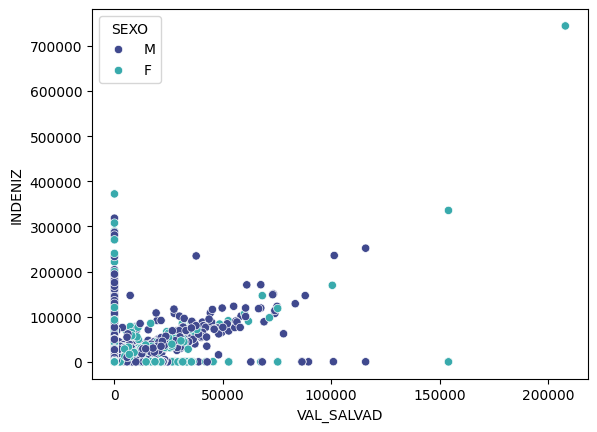

In [84]:
sns.scatterplot(data=dados, x='VAL_SALVAD', y='INDENIZ', hue='SEXO', palette='mako');

In [85]:
#17) - Analise das relações entre as variaveis

<Axes: xlabel='ANO_MODELO', ylabel='INDENIZ'>

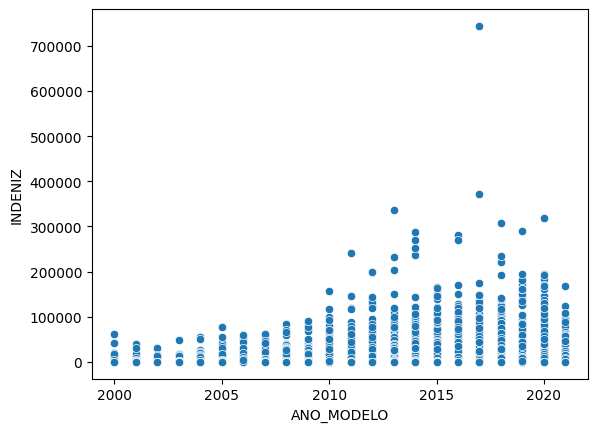

In [86]:
sns.scatterplot(data=dados, x='ANO_MODELO', y='INDENIZ')

<Axes: xlabel='IDADE', ylabel='INDENIZ'>

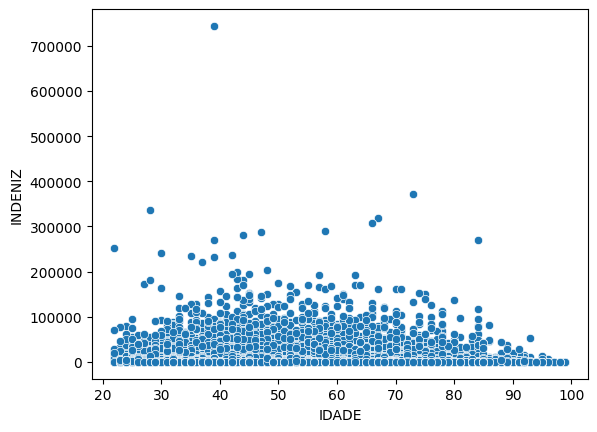

In [87]:
sns.scatterplot(data=dados, x='IDADE', y='INDENIZ')

In [88]:
#18) - Avaliar o mês com mais ocorrencia de sinistros

In [89]:
# nova coluna 'AVISO' pela transformação da data de aviso de sinistro
dados['D_AVI'] = pd.to_datetime(dados['D_AVI'], format='%Y%m%d', errors='coerce')
# criar nova coluna 'MES_AVI' calculada a partir de 'D_AVI'
dados['MES_AVI'] = dados['D_AVI'].dt.month
# criar nova coluna 'ANO_AVI' calculada a partir de 'D_AVI'
dados['ANO_AVI'] = dados['D_AVI'].dt.year
# transformar os meses e anos em inteiros
dados['MES_AVI'] = dados['MES_AVI'].astype('Int64')
dados['ANO_AVI'] = dados['ANO_AVI'].astype('Int64')
# apagar dados faltantes
dados.dropna(inplace=True)

<Figure size 1000x800 with 0 Axes>

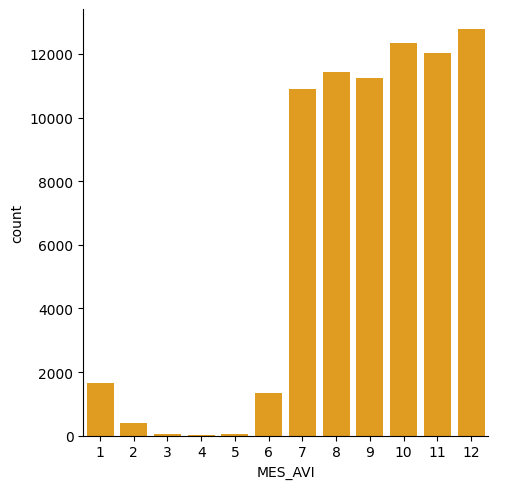

In [91]:
plt.figure(figsize=(10,8))
sns.catplot(data=dados, x='MES_AVI', kind='count', color='orange');